## Import Libraries

In [3]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Dataset

In [4]:
iris = pd.read_csv("iris.csv")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Some EDA 

### Histogram Plot

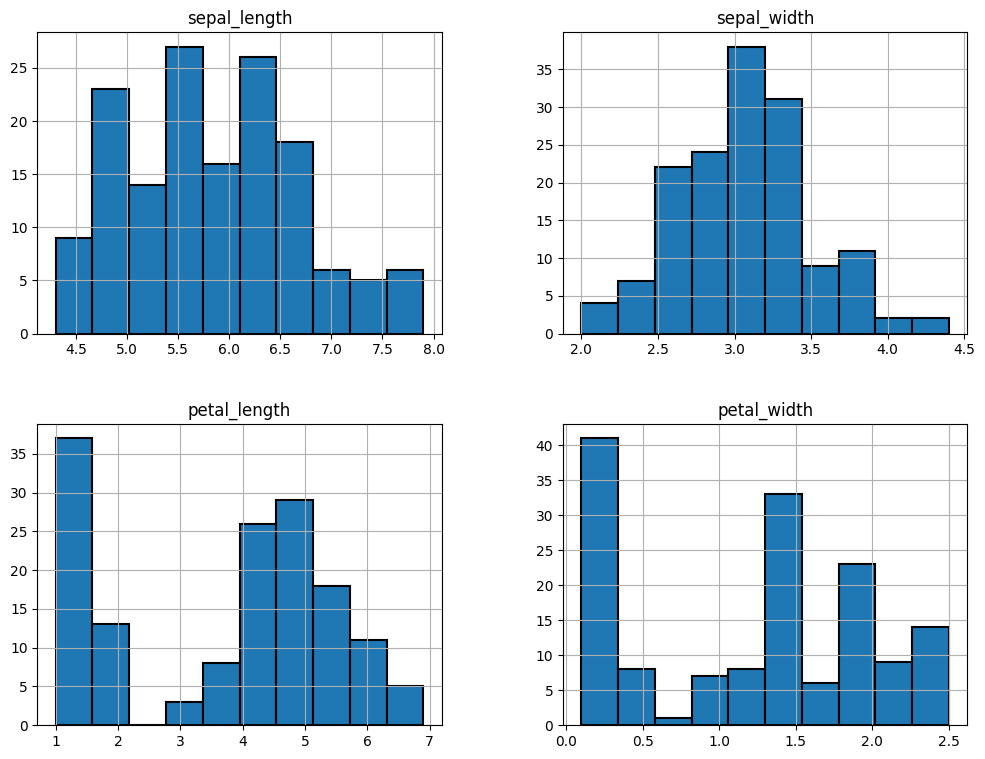

In [7]:
iris.hist(edgecolor='black', linewidth=1.5)
fig = plt.gcf()
fig.set_size_inches(12,9)
plt.show()

### Violin plot



<Axes: xlabel='species', ylabel='petal_width'>

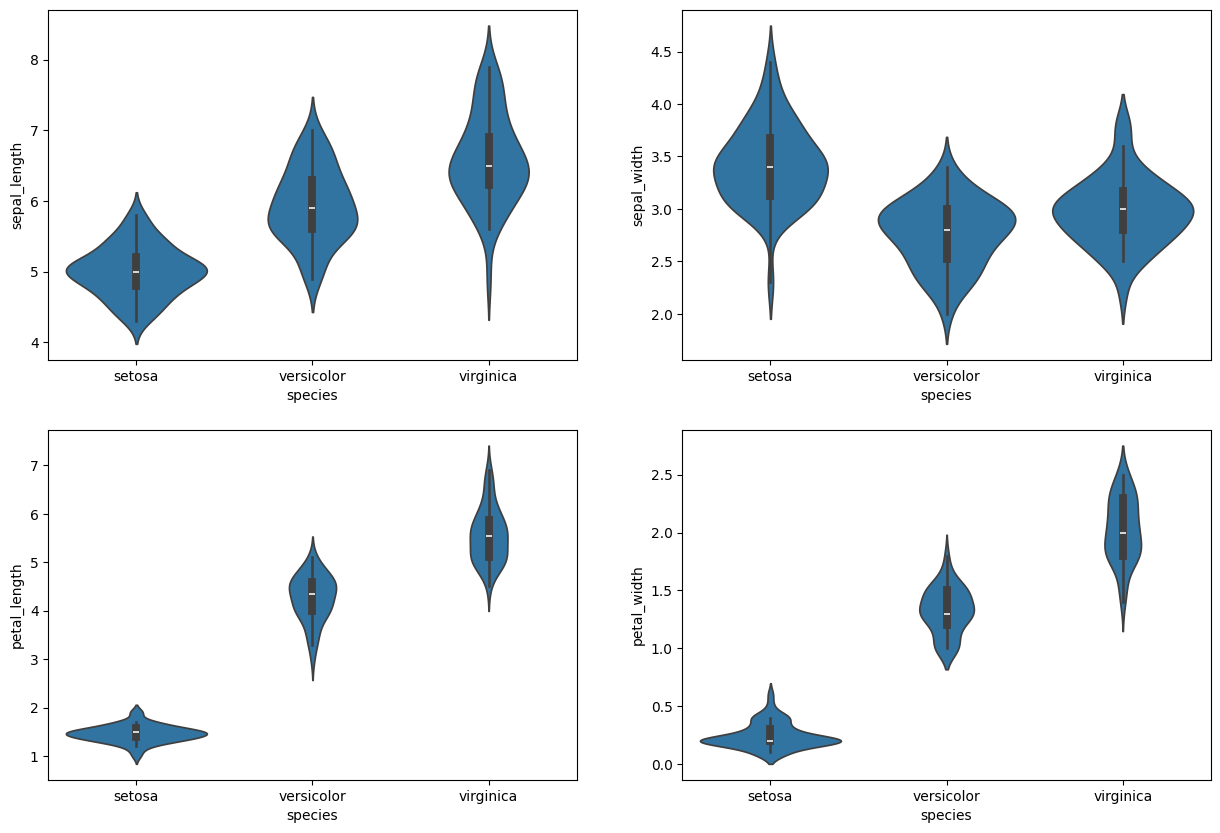

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'sepal_length', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'sepal_width', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='species', y = 'petal_length', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'petal_width', data=iris)

In [9]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [10]:
iris.shape

(150, 5)

### Splitting Data into Trainning and Testing

In [11]:
train, test = train_test_split(iris, test_size=0.6) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(60, 5)
(90, 5)


In [12]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']] # taking the training data features
train_y = train.species # output of the training data

test_X = test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data feature
test_y = test.species # output value of the test data

In [13]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
70,5.9,3.2,4.8,1.8
122,7.7,2.8,6.7,2.0
147,6.5,3.0,5.2,2.0
124,6.7,3.3,5.7,2.1
54,6.5,2.8,4.6,1.5


In [14]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
70,5.9,3.2,4.8,1.8
122,7.7,2.8,6.7,2.0
147,6.5,3.0,5.2,2.0
124,6.7,3.3,5.7,2.1
54,6.5,2.8,4.6,1.5


In [15]:
train_y.head()

70     versicolor
122     virginica
147     virginica
124     virginica
54     versicolor
Name: species, dtype: object

## Support Vector Machine (SVM)

In [16]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9666666666666667


### Logistic Regression 

In [17]:
lf_model = LogisticRegression()
lf_model.fit(train_X, train_y)
prediction = lf_model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9777777777777777


## Decision Trees

In [18]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9444444444444444


### K-Nearest Neighbors

In [19]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9777777777777777


### Creating Sepals and Petals Training Data

In [20]:
petal = iris[['petal_length','petal_width','species']]
sepal = iris[['sepal_length','sepal_width','species']]

### for iris Petals

In [21]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['petal_width','petal_length']]
train_y_p = train_p.species
test_x_p = test_p[['petal_width','petal_length']]
test_y_p = test_p.species

### for iris sepals

In [22]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['sepal_width','sepal_length']]
train_y_s = train_s.species
test_x_s = test_s[['sepal_width','sepal_length']]
test_y_s = test_s.species

## SVM Algorithm

In [23]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


## Logistic Regressions

In [24]:
lf_model = LogisticRegression()
lf_model.fit(train_x_p,train_y_p) 
prediction=lf_model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

lf_model.fit(train_x_s,train_y_s) 
prediction=lf_model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


## Decision Tree

In [25]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


## K-Nearest Neighbors

In [26]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


## Pickle module 

### pickle is used to stoare the ml models

In [27]:
import pickle

with open("iris_model.pkl", "wb") as f:
    pickle.dump(lf_model, f)

print("Models saved successfully.")

Models saved successfully.
